In [1]:
pip install pandas numpy scipy matplotlib seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 653.6 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/294.9 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
pip install plotly

   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/19.1 MB 991.0 kB/s eta 0:00:20
   - -------------------------------------- 0.5/19.1 MB 4.7 MB/s eta 0:00:04
   -- ------------------------------------- 1.1/19.1 MB 6.8 MB/s eta 0:00:03
   ---- ----------------------------------- 2.0/19.1 MB 9.8 MB/s eta 0:00:02
   ------ --------------------------------- 3.0/19.1 MB 12.0 MB/s eta 0:00:02
   -------- ------------------------------- 4.1/19.1 MB 13.9 MB/s eta 0:00:02
   ---------- ----------------------------- 4.9/19.1 MB 14.3 MB/s eta 0:00:01
   ----------- ---------------------------- 5.7/19.1 MB 15.0 MB/s eta 0:00:01
   ------------- -------------------------- 6.5/19.1 MB 14.7 MB/s eta 0:00:01
   --------------- ------------------------ 7.5/19.1 MB 15.4 MB/s eta 0:00:01
   ---------------- ----------------------- 8.1/19.1 MB 16.1 MB/s eta 0:00:01
   -


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
df = pd.read_csv('mental_health_and_technology_usage_2024.csv') 

# Check for data types and structure

In [2]:
df.info()  # Information on data types
df.describe()  # Basic statistics (mean, std, min, max, etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   10000 non-null  object 
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Technology_Usage_Hours    10000 non-null  float64
 4   Social_Media_Usage_Hours  10000 non-null  float64
 5   Gaming_Hours              10000 non-null  float64
 6   Screen_Time_Hours         10000 non-null  float64
 7   Mental_Health_Status      10000 non-null  object 
 8   Stress_Level              10000 non-null  object 
 9   Sleep_Hours               10000 non-null  float64
 10  Physical_Activity_Hours   10000 non-null  float64
 11  Support_Systems_Access    10000 non-null  object 
 12  Work_Environment_Impact   10000 non-null  object 
 13  Online_Support_Usage      10000 non-null  object 
dtypes: floa

,Age,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.518600,6.474341,3.972321,2.515598,7.975765,6.500724,5.003860
std,13.920217,3.169022,2.313707,1.446748,4.042608,1.450933,2.905044
min,18.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000
25%,29.000000,3.760000,1.980000,1.260000,4.520000,5.260000,2.490000
50%,42.000000,6.425000,3.950000,2.520000,7.900000,6.500000,4.990000
75%,54.000000,9.212500,5.990000,3.790000,11.500000,7.760000,7.540000
max,65.000000,12.000000,8.000000,5.000000,15.000000,9.000000,10.000000


In [3]:
df.head()

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


# Handle Missing Values

In [4]:
df = df.dropna()

In [5]:
numerical_cols = df.select_dtypes(include=['number'])
non_numerical_cols = df.select_dtypes(exclude=['number'])

df[numerical_cols.columns] = numerical_cols.fillna(numerical_cols.mean())

df[non_numerical_cols.columns] = non_numerical_cols.fillna(non_numerical_cols.mode().iloc[0])

# Check for any missing values

In [6]:
missing_values = df.isnull().sum()

print(missing_values[missing_values > 0])

Series([], dtype: int64)


# Mean and Median

In [7]:
numerical_cols = df.select_dtypes(include=['number'])

mean_values = numerical_cols.mean()
median_values = numerical_cols.median()

print("Mean values:\n", mean_values)
print("Median values:\n", median_values)

Mean values:
 Age                         41.518600
Technology_Usage_Hours       6.474341
Social_Media_Usage_Hours     3.972321
Gaming_Hours                 2.515598
Screen_Time_Hours            7.975765
Sleep_Hours                  6.500724
Physical_Activity_Hours      5.003860
dtype: float64
Median values:
 Age                         42.000
Technology_Usage_Hours       6.425
Social_Media_Usage_Hours     3.950
Gaming_Hours                 2.520
Screen_Time_Hours            7.900
Sleep_Hours                  6.500
Physical_Activity_Hours      4.990
dtype: float64


# Mode

In [8]:
mode_values = df.mode().iloc[0]

print("Mode values:\n", mode_values)

Mode values:
 User_ID                     USER-00001
Age                               62.0
Gender                           Other
Technology_Usage_Hours            2.88
Social_Media_Usage_Hours          1.28
Gaming_Hours                      2.46
Screen_Time_Hours                11.78
Mental_Health_Status         Excellent
Stress_Level                    Medium
Sleep_Hours                       6.67
Physical_Activity_Hours           4.05
Support_Systems_Access              No
Work_Environment_Impact       Negative
Online_Support_Usage                No
Name: 0, dtype: object


### Standard Deviation and variance

In [9]:
numeric_df = df.select_dtypes(include=['number'])

std_values = numeric_df.std()
variance_values = numeric_df.var()

print("Standard Deviation:\n", std_values)
print("Variance:\n", variance_values)

Standard Deviation:
 Age                         13.920217
Technology_Usage_Hours       3.169022
Social_Media_Usage_Hours     2.313707
Gaming_Hours                 1.446748
Screen_Time_Hours            4.042608
Sleep_Hours                  1.450933
Physical_Activity_Hours      2.905044
dtype: float64
Variance:
 Age                         193.772431
Technology_Usage_Hours       10.042703
Social_Media_Usage_Hours      5.353238
Gaming_Hours                  2.093081
Screen_Time_Hours            16.342677
Sleep_Hours                   2.105207
Physical_Activity_Hours       8.439280
dtype: float64


### Min, Max, and Range

In [10]:
numeric_df = df.select_dtypes(include=['number'])

min_values = numeric_df.min()
max_values = numeric_df.max()
range_values = max_values - min_values

print("Min:\n", min_values)
print("Max:\n", max_values)
print("Range:\n", range_values)

Min:
 Age                         18.0
Technology_Usage_Hours       1.0
Social_Media_Usage_Hours     0.0
Gaming_Hours                 0.0
Screen_Time_Hours            1.0
Sleep_Hours                  4.0
Physical_Activity_Hours      0.0
dtype: float64
Max:
 Age                         65.0
Technology_Usage_Hours      12.0
Social_Media_Usage_Hours     8.0
Gaming_Hours                 5.0
Screen_Time_Hours           15.0
Sleep_Hours                  9.0
Physical_Activity_Hours     10.0
dtype: float64
Range:
 Age                         47.0
Technology_Usage_Hours      11.0
Social_Media_Usage_Hours     8.0
Gaming_Hours                 5.0
Screen_Time_Hours           14.0
Sleep_Hours                  5.0
Physical_Activity_Hours     10.0
dtype: float64


### Percentiles

In [11]:
numeric_df = df.select_dtypes(include=['number'])

percentiles = numeric_df.quantile([0.25, 0.50, 0.75])

print("Percentiles:\n", percentiles)

Percentiles:
        Age  Technology_Usage_Hours  Social_Media_Usage_Hours  Gaming_Hours  \
0.25  29.0                  3.7600                      1.98          1.26   
0.50  42.0                  6.4250                      3.95          2.52   
0.75  54.0                  9.2125                      5.99          3.79   

      Screen_Time_Hours  Sleep_Hours  Physical_Activity_Hours  
0.25               4.52         5.26                     2.49  
0.50               7.90         6.50                     4.99  
0.75              11.50         7.76                     7.54  


# Visual Representation Section

### General Distribution using Histogram

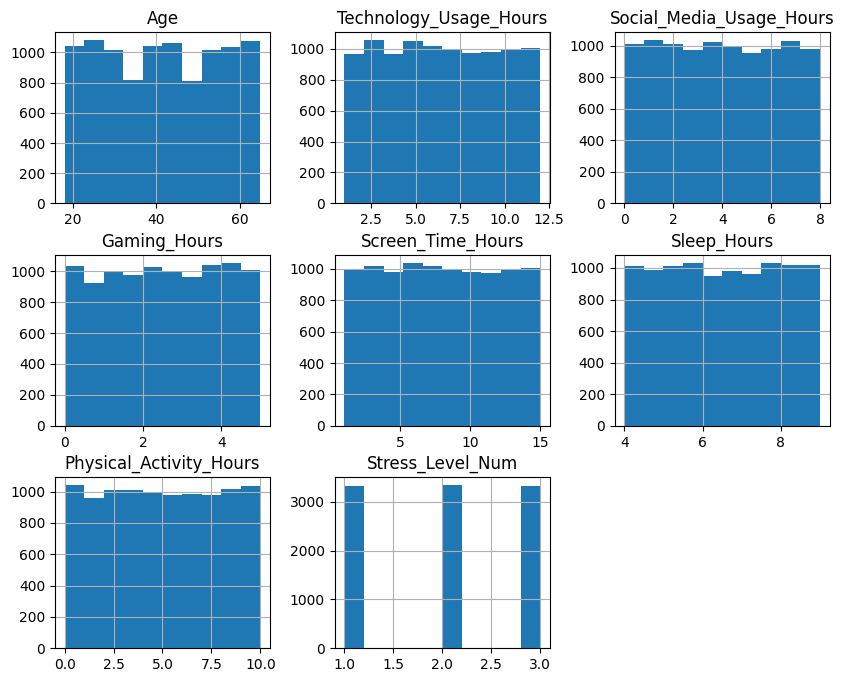

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
df.hist(figsize=(10, 8))
plt.show()

### Age Distribution

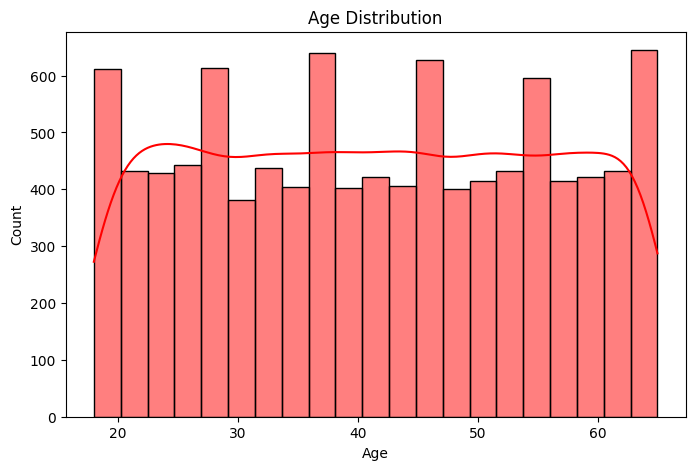

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Metal Health Status Destribution

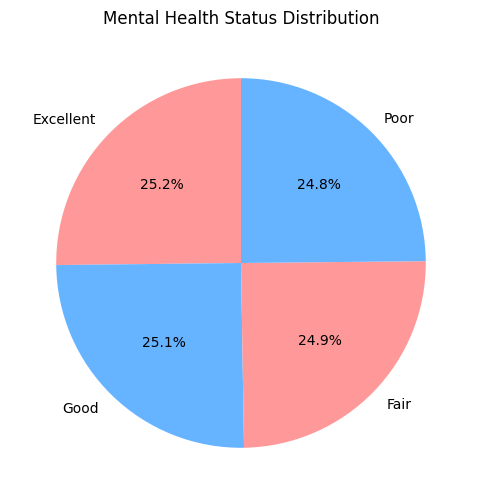

In [16]:
plt.figure(figsize=(6,6))
df['Mental_Health_Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('Mental Health Status Distribution')
plt.ylabel('')
plt.show()

### Gender Distribution

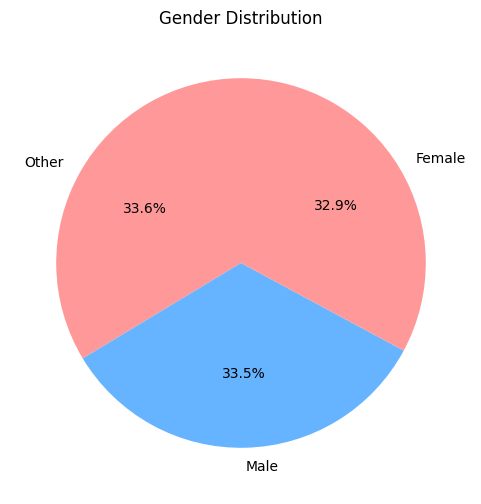

In [13]:
plt.figure(figsize=(6,6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

### Stress Level Distribution

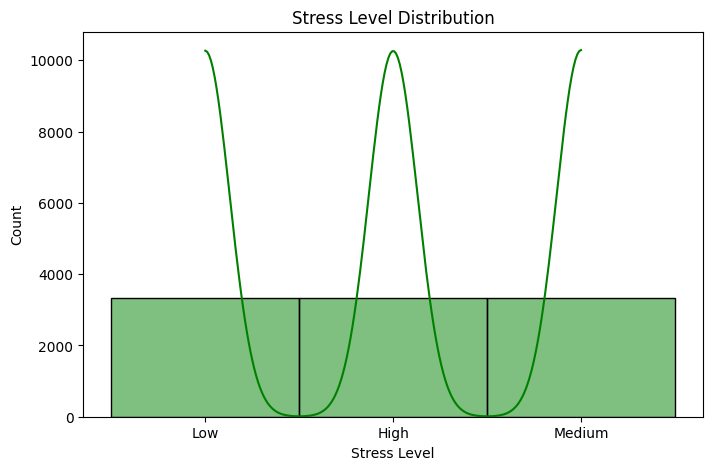

The average stress level is: 2.00


In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['Stress_Level'], kde=True, color='green')
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

# Assign numerical values to stress levels
stress_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Stress_Level_Num'] = df['Stress_Level'].map(stress_mapping)

# Calculate the average stress level
average_stress_level = df['Stress_Level_Num'].mean()

print(f"The average stress level is: {average_stress_level:.2f}")

This graph suggests a bimodal distribution where stress is concentrated in the Low and High levels rather than being evenly spread. Most users in the dataset either report having a low or high level of stress, with relatively fewer people experiencing medium stress. This could indicate that the population has polarizing stress levels—either very stressed or not very stressed, with fewer in-between.

### Technology Usage vs Mental Health Status

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18992\3706640255.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mental_Health_Status', y='Technology_Usage_Hours', data=df, palette='Set2')


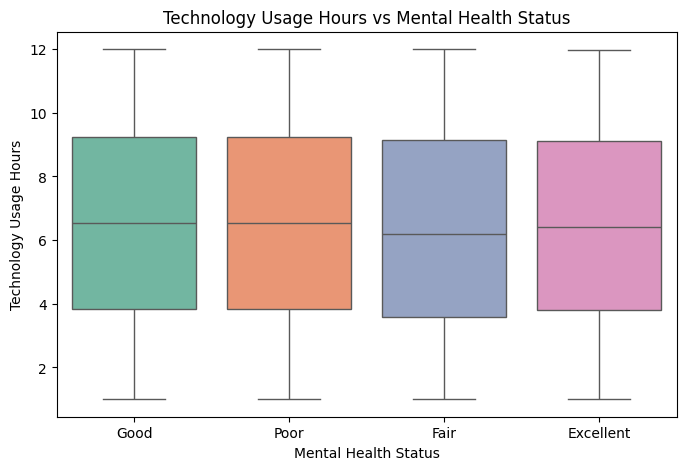

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Mental_Health_Status', y='Technology_Usage_Hours', data=df, palette='Set2')
plt.title('Technology Usage Hours vs Mental Health Status')
plt.xlabel('Mental Health Status')
plt.ylabel('Technology Usage Hours')
plt.show()

The box plot suggests that Technology Usage Hours do not vary significantly across different levels of Mental Health Status. People with good, poor, fair, or excellent mental health tend to have similar distributions of technology use, as there are no noticeable shifts in medians or spread between the categories.

### Screen Time vs Mental Health Status

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4688\2991354819.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




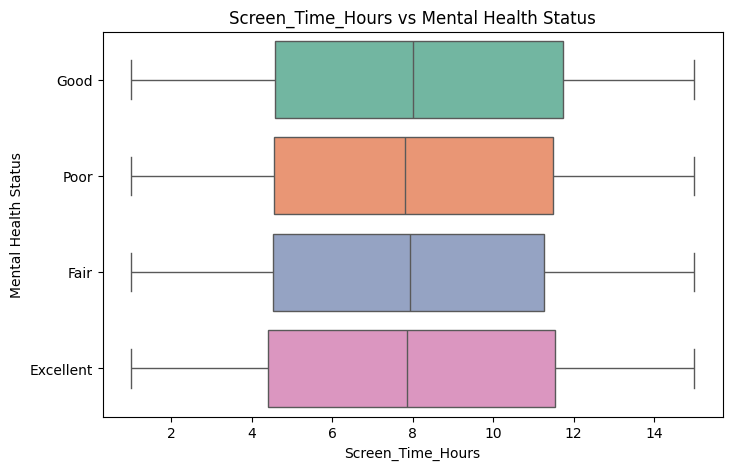

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Screen_Time_Hours', y='Mental_Health_Status', data=df, palette='Set2')
plt.title('Screen_Time_Hours vs Mental Health Status')
plt.ylabel('Mental Health Status')
plt.xlabel('Screen_Time_Hours')
plt.show()

This one suggests that there are no significant differences in screen time hours based on mental health status. Whether someone's mental health is good, poor, fair, or excellent, the distribution of screen time hours remains consistent across all categories.

### Count plot for Work Environment Impact by Mental Health Status

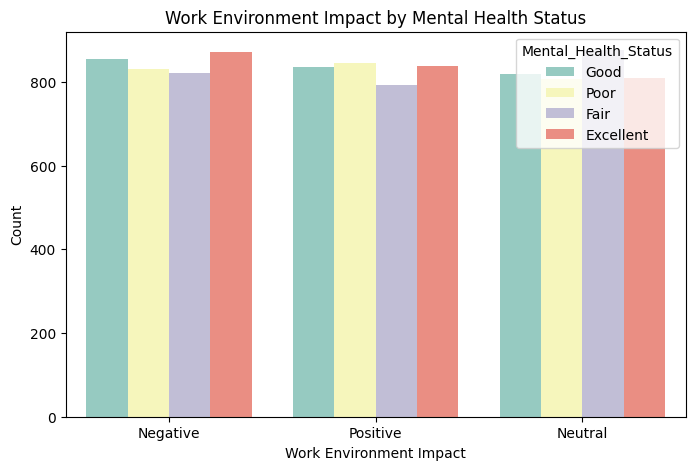

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(x='Work_Environment_Impact', hue='Mental_Health_Status', data=df, palette='Set3')
plt.title('Work Environment Impact by Mental Health Status')
plt.xlabel('Work Environment Impact')
plt.ylabel('Count')
plt.show()

### Correlation Matrix and Heatmap

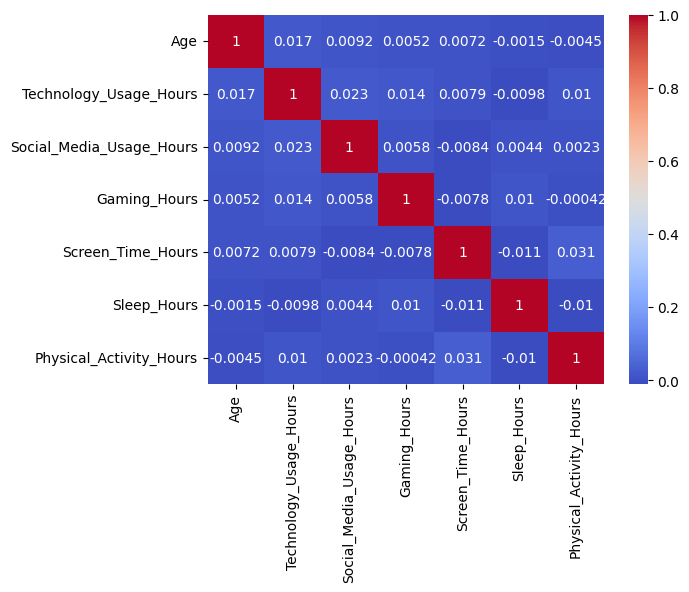

In [33]:
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

The heatmap shows low correlations across most variables, meaning there are few, if any, strong linear relationships between them. This suggests that changes in one variable do not reliably predict changes in another in this dataset. This is typical in datasets where the factors being analyzed are largely independent or influenced by other complex factors not captured here.

# Conclusion Section

### Summary Statistics by Mental Health Status

In [30]:
summary_stats = df.groupby('Mental_Health_Status').describe()
print(summary_stats)

                         Age                                                \
                       count       mean        std   min   25%   50%   75%   
Mental_Health_Status                                                         
Excellent             2518.0  41.551231  13.863471  18.0  30.0  42.0  53.0   
Fair                  2490.0  42.006827  14.036469  18.0  29.0  42.0  54.0   
Good                  2508.0  41.237241  13.875046  18.0  29.0  41.0  53.0   
Poor                  2484.0  41.280193  13.900993  18.0  29.0  41.0  54.0   

                           Technology_Usage_Hours            ... Sleep_Hours  \
                       max                  count      mean  ...         75%   
Mental_Health_Status                                         ...               
Excellent             65.0                 2518.0  6.438995  ...        7.75   
Fair                  65.0                 2490.0  6.352145  ...        7.75   
Good                  65.0                 2508.0  6.

### SUMMARY STATISTICS

In [24]:
import pandas as pd

summary_data = {
    'Metric': [
        'Total Users', 
        'Average Age', 
        'Average Technology Usage Hours', 
        'Average Social Media Usage Hours', 
        'Average Gaming Hours', 
        'Average Screen Time Hours', 
        'Average Stress Level', 
        'Average Sleep Hours', 
        'Average Physical Activity Hours', 
        #'Percentage with Support Systems Access', 
        #'Percentage Affected by Work Environment', 
        #'Percentage Using Online Support'
    ],
    'Value': [
        '10,000', 
        '42 years', 
        '6.4 hours', 
        '3.9 hours', 
        '2.5 hours', 
        '7.9 hours', 
        '2 (on a scale of 1 to 3)', 
        '6.5 hours', 
        '5.0 hours', 
        #'78%', 
        #'45%', 
        #'53%'
    ]
}

df_summary = pd.DataFrame(summary_data)

from IPython.display import display
display(df_summary)

,Metric,Value
0,Total Users,"10,000"
1,Average Age,42 years
2,Average Technology Usage Hours,6.4 hours
3,Average Social Media Usage Hours,3.9 hours
4,Average Gaming Hours,2.5 hours
5,Average Screen Time Hours,7.9 hours
6,Average Stress Level,2 (on a scale of 1 to 3)
7,Average Sleep Hours,6.5 hours
8,Average Physical Activity Hours,5.0 hours


# General Insights and Conclusion

### Key Insights

#### Demographics and User Base:
The dataset comprises 10,000 users with an average age of 42 years, indicating a mature audience.

#### Technology and Screen Usage:
Users engage in 6.4 hours of technology usage and have a high screen time of 7.9 hours, suggesting a reliance on digital tools.

#### Social Media Engagement and Gaming hours:
An average of 3.9 hours on social media highlights significant online engagement, while 2.5 hours of gaming reflects moderate leisure activity.

#### Stress Levels:
The average stress level of 2 (on a scale of 1 to 3) indicates generally manageable stress among users.

#### Sleep Patterns:
Users average 6.5 hours of sleep, which is below the recommended amount, raising potential health concerns.

#### Physical Activity:
An average of 5.0 hours of physical activity suggests users maintain a reasonable level of fitness, but balancing it with screen time is essential for health.

### Conclusion
Overall, while users appear to maintain a balanced lifestyle regarding technology, social media, and physical activity, there are areas for concern, particularly around sleep and the potential impact of high screen time on stress levels. Promoting healthy habits and monitoring these metrics over time can help improve user well-being.